In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y = (plot_x - 2.5) ** 2 - 1

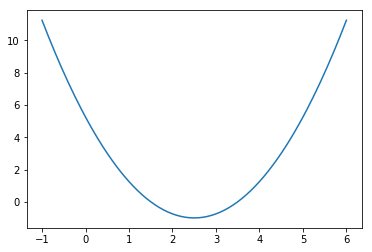

In [4]:
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
def dJ_old(theta):
    return 2 * (theta - 2.5)

In [6]:
def J_old(theta):
    return (theta - 2.5) ** 2 - 1

In [7]:
def gradient_descent_old(initial_theta, eta, epsilon = 1e-8, n_iters = 1e4):
    theta = initial_theta
    theta_history.append(theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ_old(theta)
        theta = theta - eta * gradient
        theta_history.append(theta)
        if(abs(J_old(theta_history[-2]) - J_old(theta_history[-1])) < epsilon):
            break
        i_iter += 1
    if i_iter == (n_iters+1) :
        print("eta is too big")
    
def plot_theta_history():
    plt.plot(plot_x, J_old(plot_x))
    plt.plot(np.array(theta_history), J_old(np.array(theta_history)), color = 'r', marker = '+')
    plt.show()

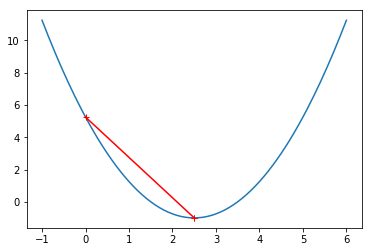

In [8]:
theta_history = []
gradient_descent_old(0.0, 0.5)
plot_theta_history()

# 在线性回归模型中实现梯度下降法

In [9]:
np.random.seed = 666
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. +np.random.normal(size = 100)

In [10]:
X = x.reshape(-1, 1)

In [11]:
X.shape

(100, 1)

In [12]:
y.shape

(100,)

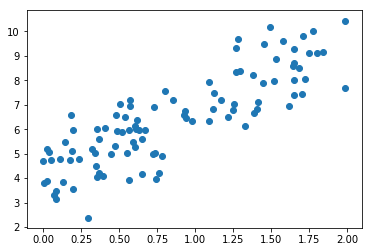

In [13]:
plt.scatter(x, y)
plt.show()

In [14]:
def J(theta, X_b, y):
    try:
        return np.sum(y - X_b.dot(theta) ** 2) / len(X_b)
    except:
        return float('inf')

In [15]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [16]:
def gradient_descent(X_b, y, initial_theta, eta, epsilon = 1e-8, n_iters = 1e4):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(last_theta, X_b, y) - J(theta, X_b, y)) < epsilon):
            break
        i_iter += 1
        
    if i_iter == (n_iters+1) :
        print("eta is too big")
        
    return theta

In [17]:
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [18]:
theta

array([4.11731621, 2.68670979])

## playML封装的gd

In [19]:
from playML.LinearRegression import LinearRegression

In [20]:
my_lr_reg = LinearRegression()

In [21]:
my_lr_reg.fit_gd(X, y)

LinearRegression()

In [22]:
print(my_lr_reg.coef_)
print(my_lr_reg.interception_)

[2.68730781]
4.116698403091539


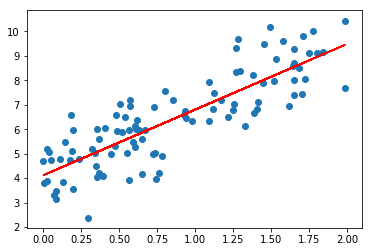

In [23]:
plt.scatter(X,y)
plt.plot(X,my_lr_reg.predict(X), color = 'r')
plt.show()